This is the CSV Generation code for BPM conversion

In [5]:
import pandas as pd

# Load the R-R interval data
file_path = "/home/Gurshan.R/Documents/GitHub/SYSC4907_Capstone/GAN_Bradycardia/CSV_DATA/RR_intervals_Bradycardia.csv"  # Update with correct file path if needed
df = pd.read_csv(file_path)

# Ensure the correct column is selected
rr_column = "RR_interval"  # Adjust this if the column name differs
if rr_column not in df.columns:
    raise ValueError(f"Column '{rr_column}' not found in the dataset.")

# Convert R-R intervals (ms) to BPM: BPM = 60000 / RR_interval
df["BPM"] = 60 / df[rr_column]

# Save to a new CSV file
output_file = "/home/Gurshan.R/Downloads/BPM_Bradycardia.csv"
df.to_csv(output_file, index=False)
df[["BPM"]].to_csv("/home/Gurshan.R/Downloads/BPM_Only_Bradycardia.csv", index=False)


print(f"Conversion complete. BPM data saved to {output_file}")


Conversion complete. BPM data saved to /home/Gurshan.R/Downloads/BPM_Bradycardia.csv


This is the plotting code after BPM conversion - showing bradycardia instances

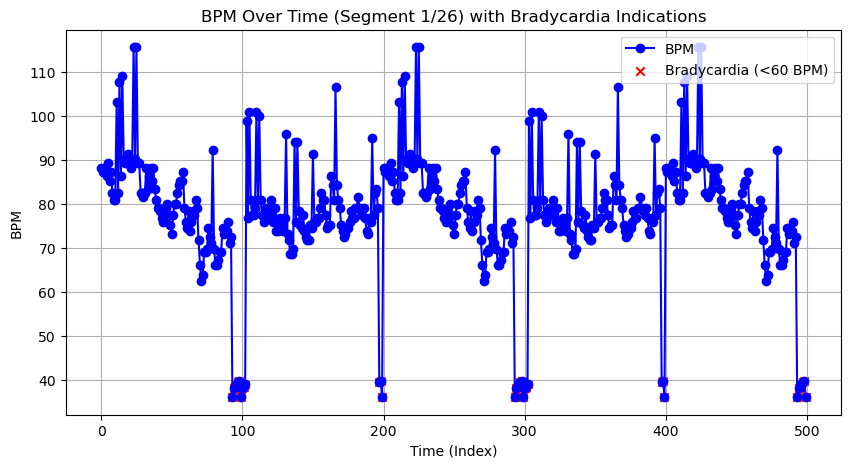

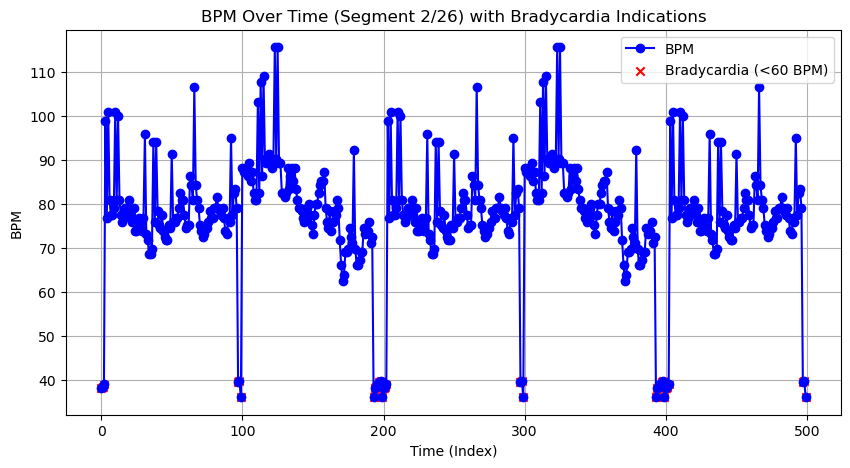

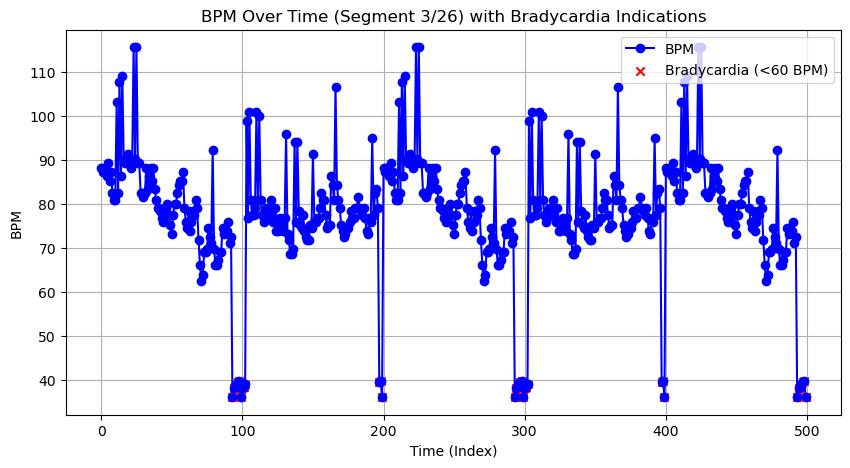

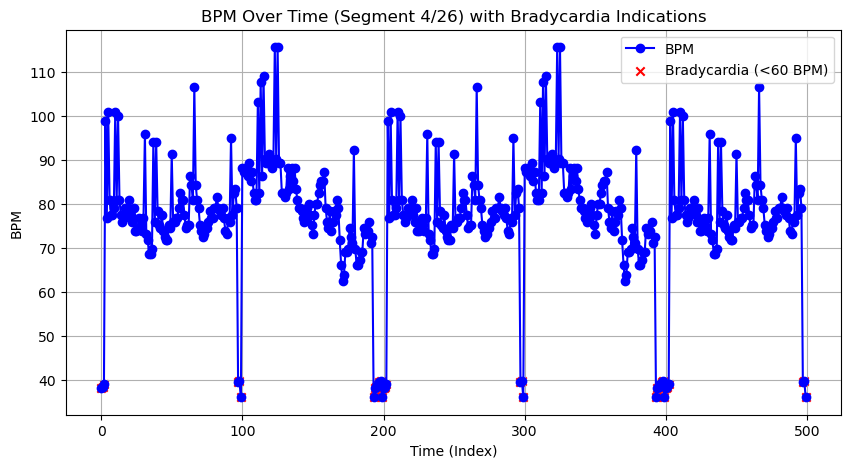

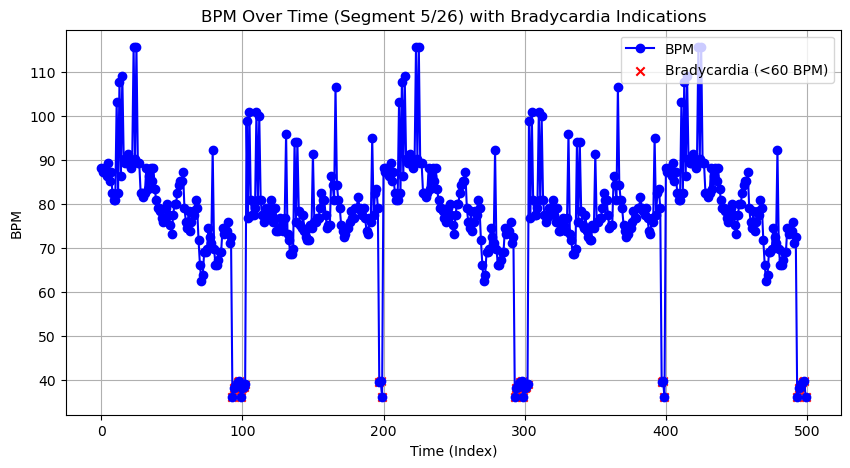

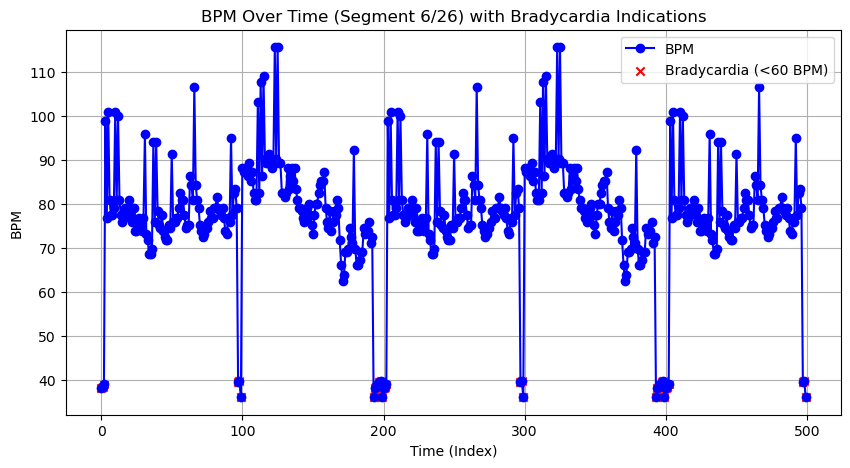

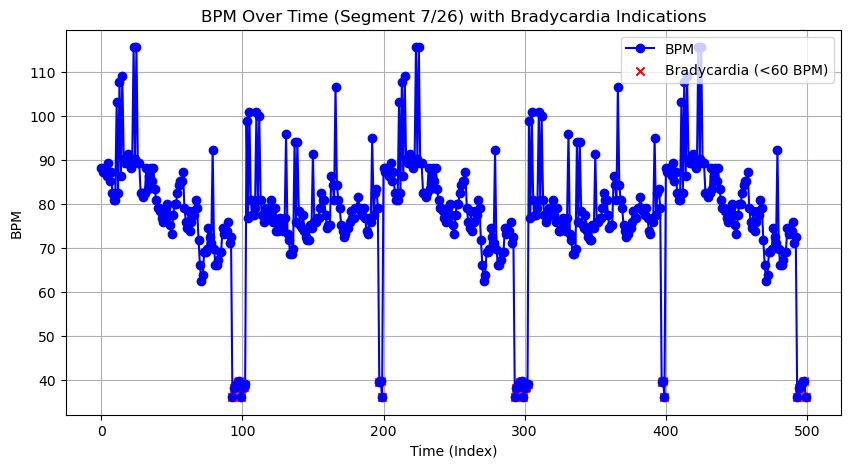

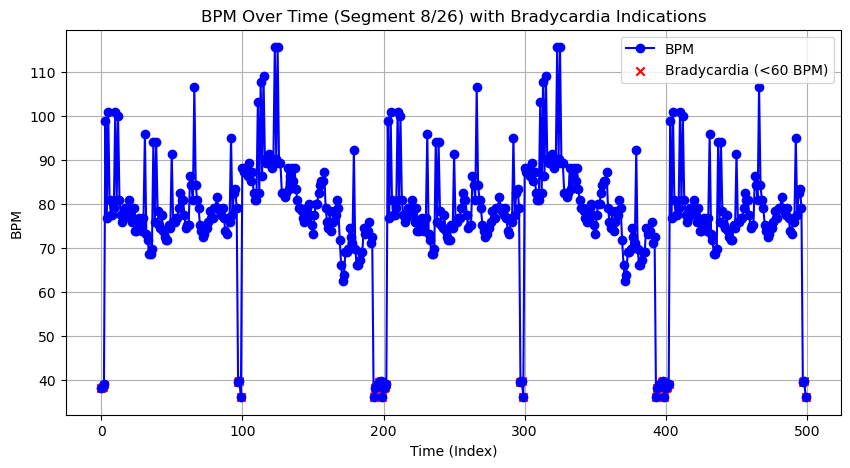

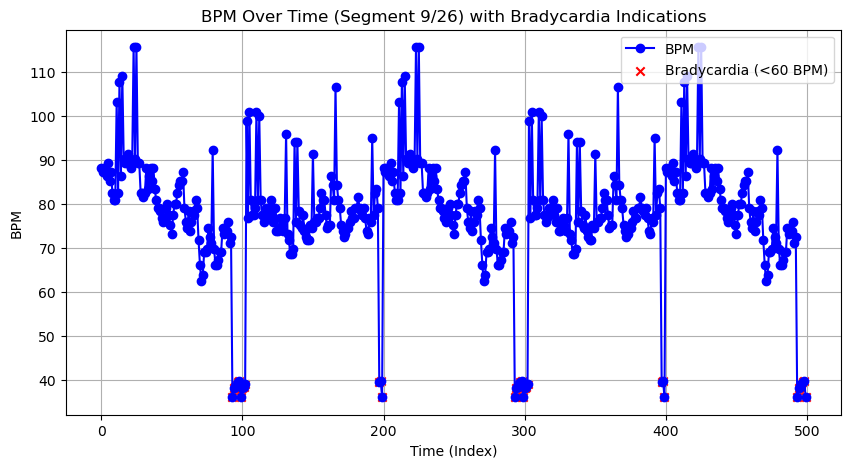

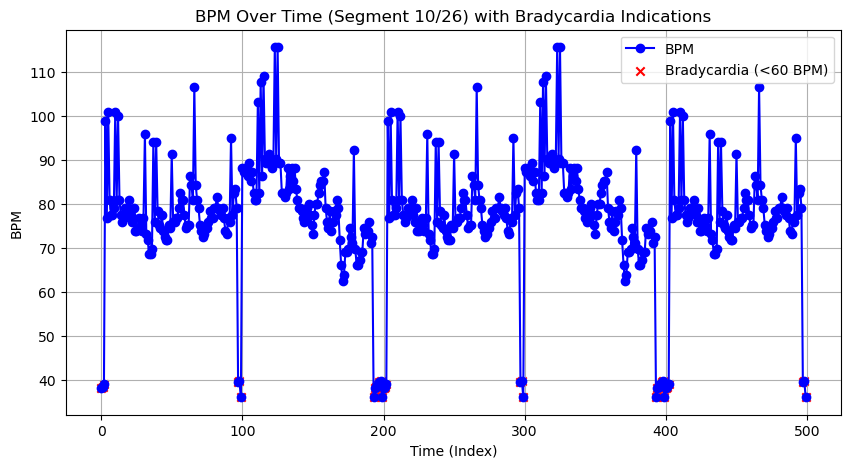

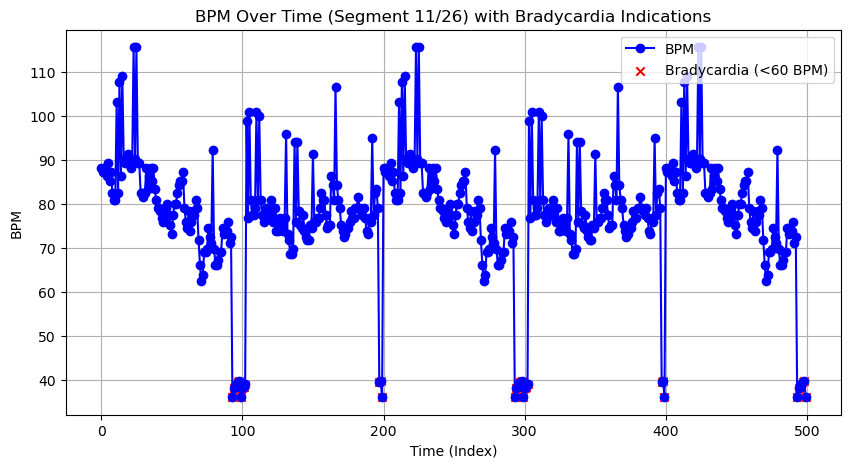

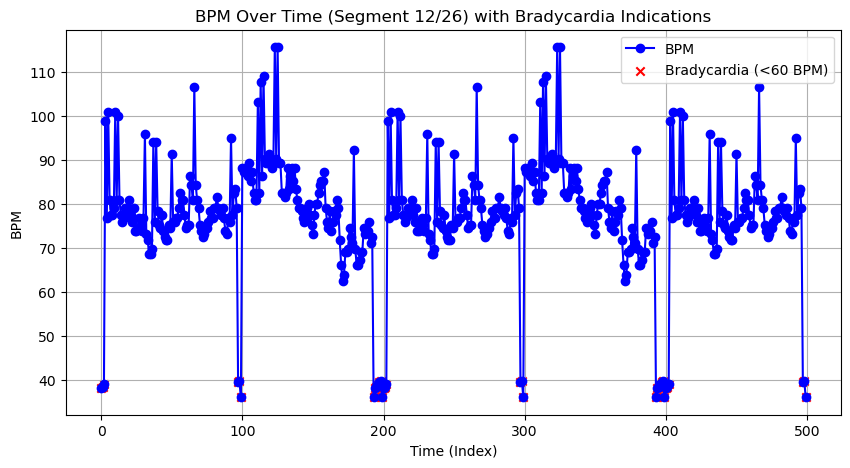

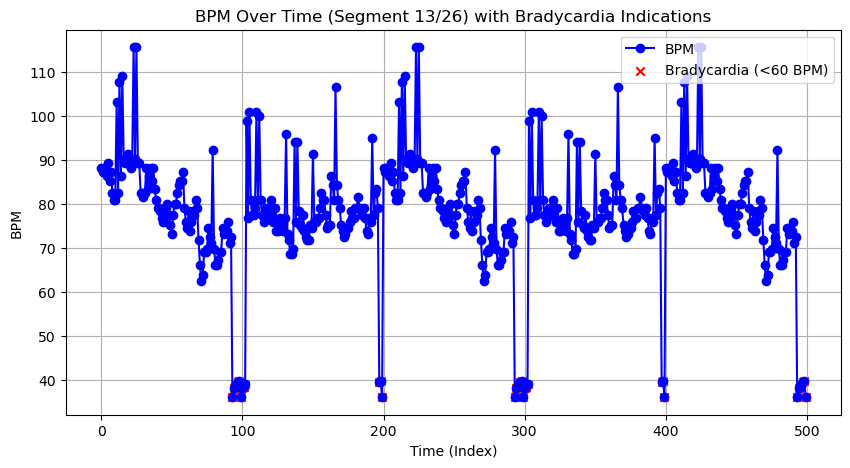

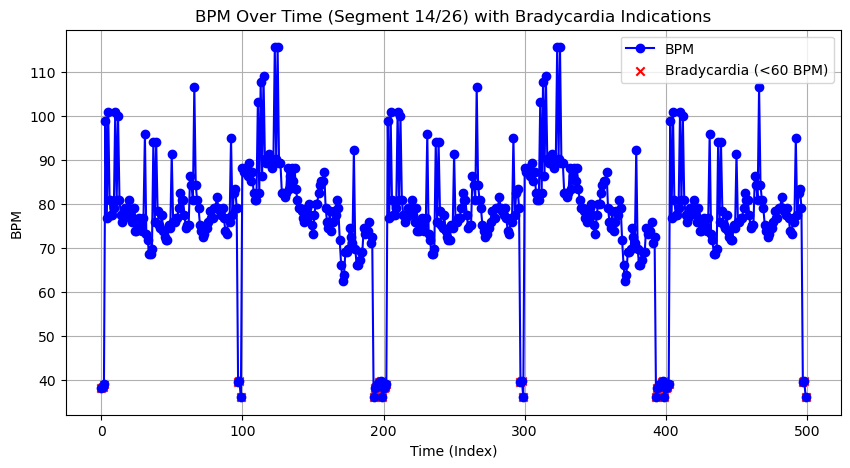

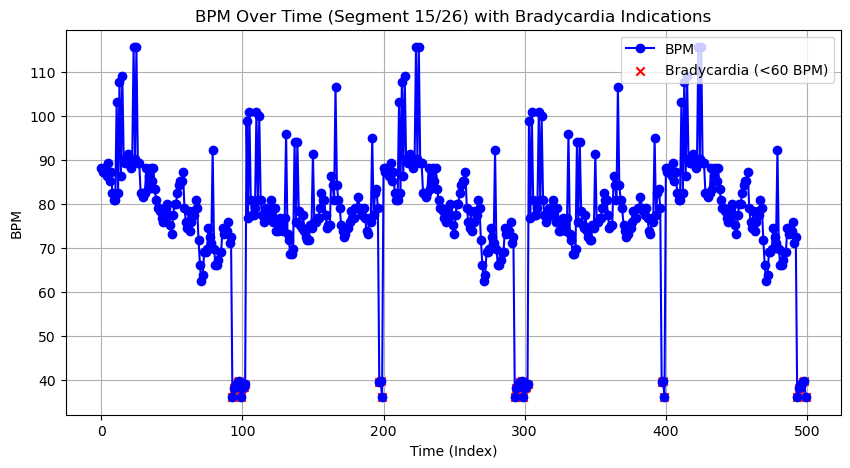

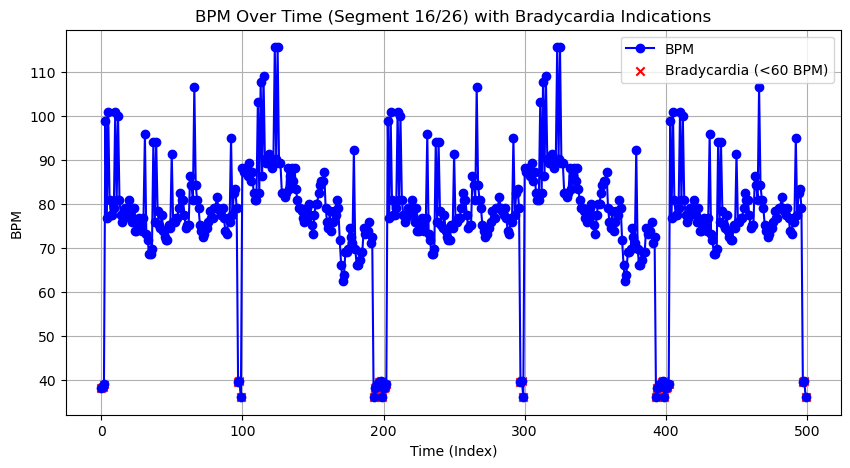

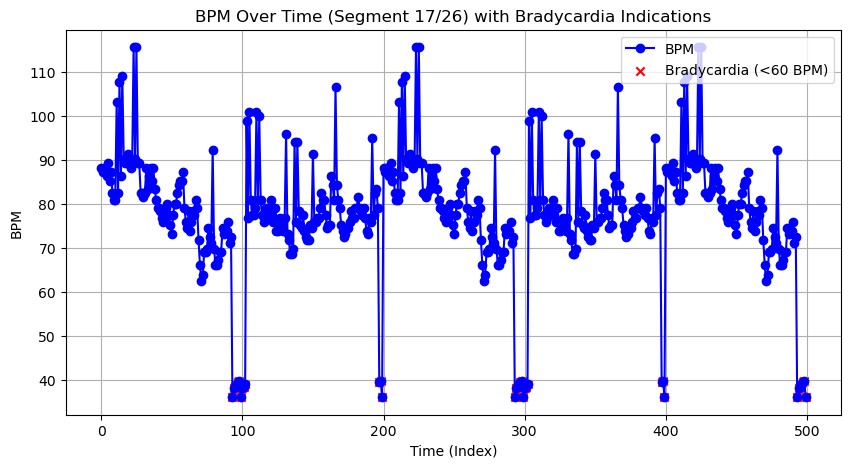

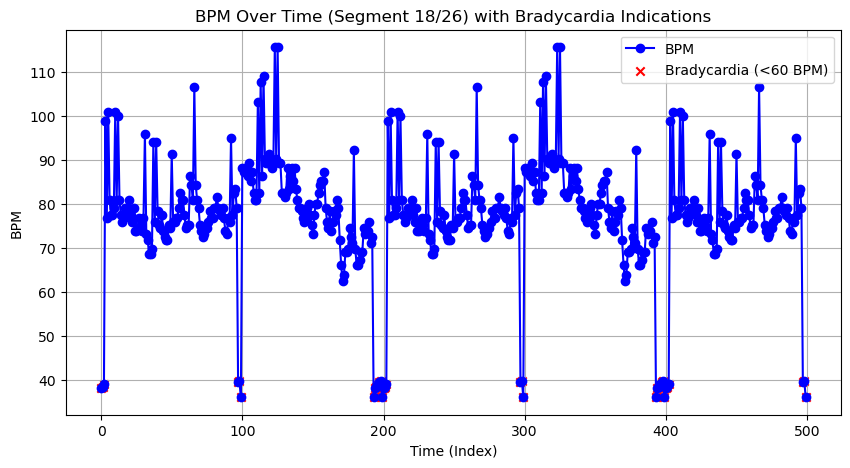

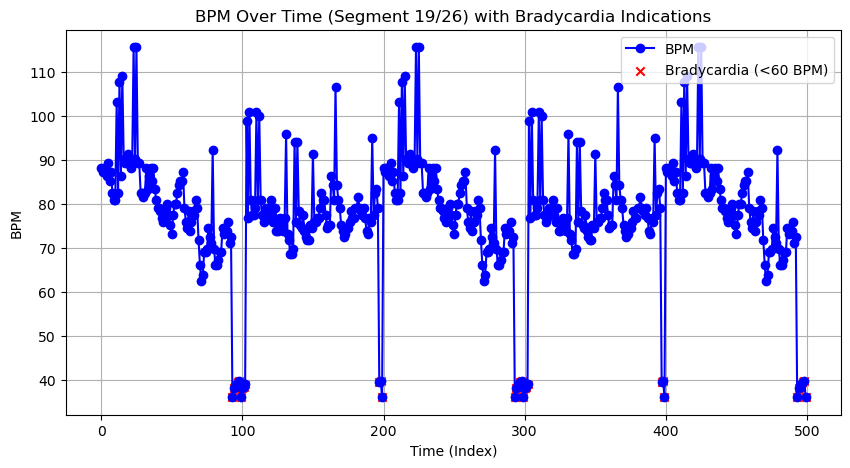

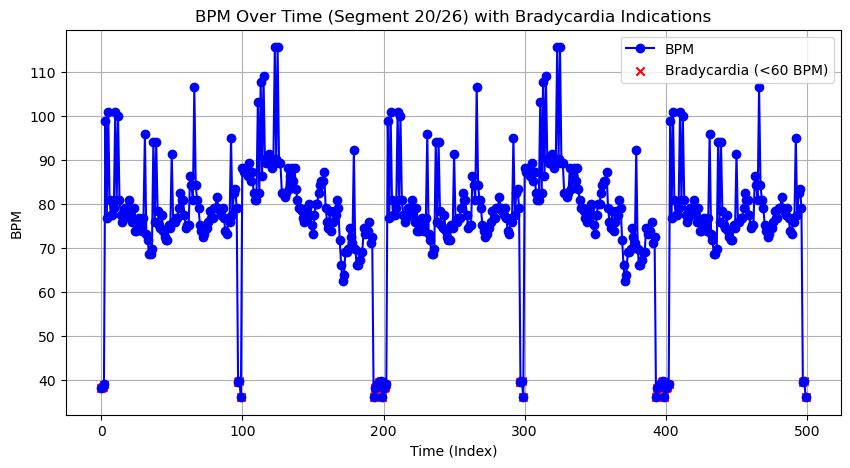

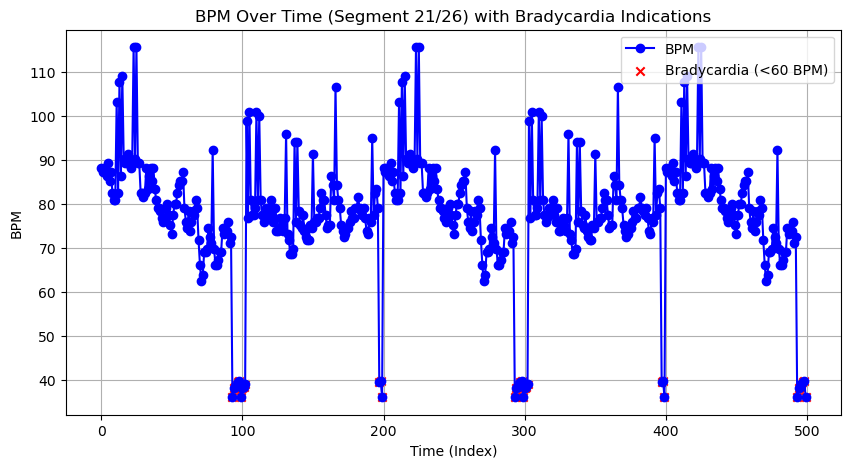

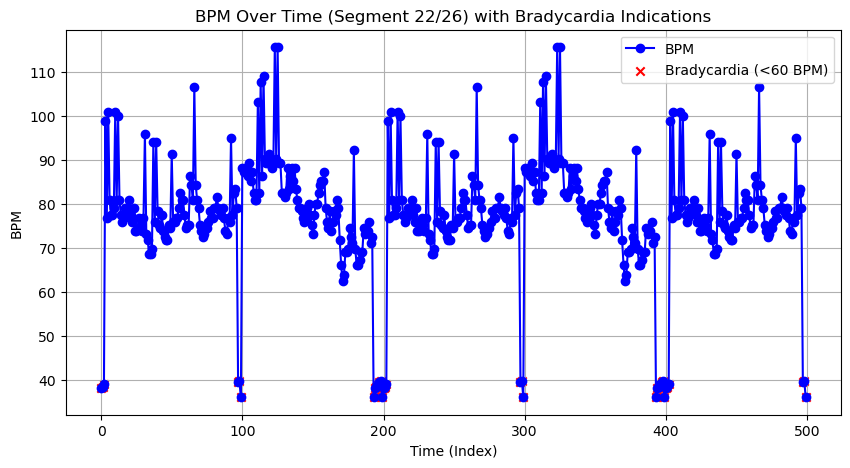

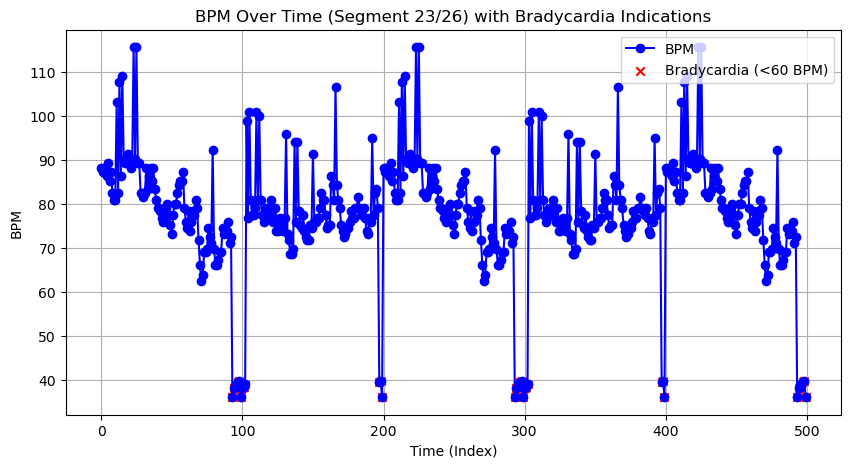

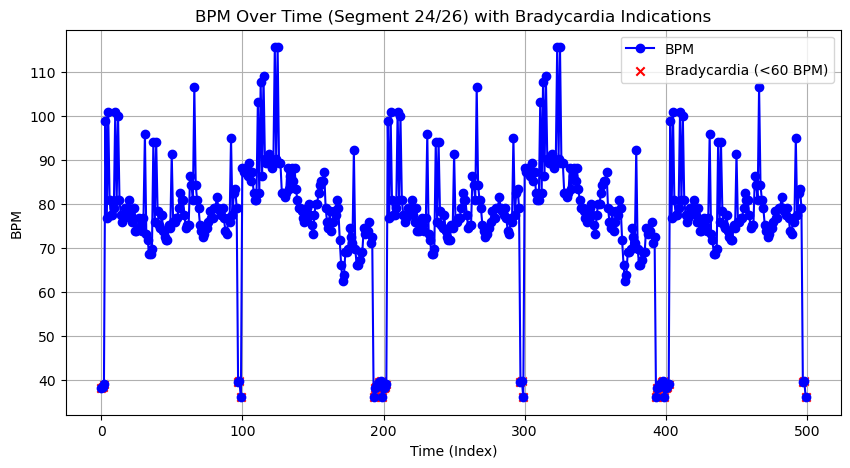

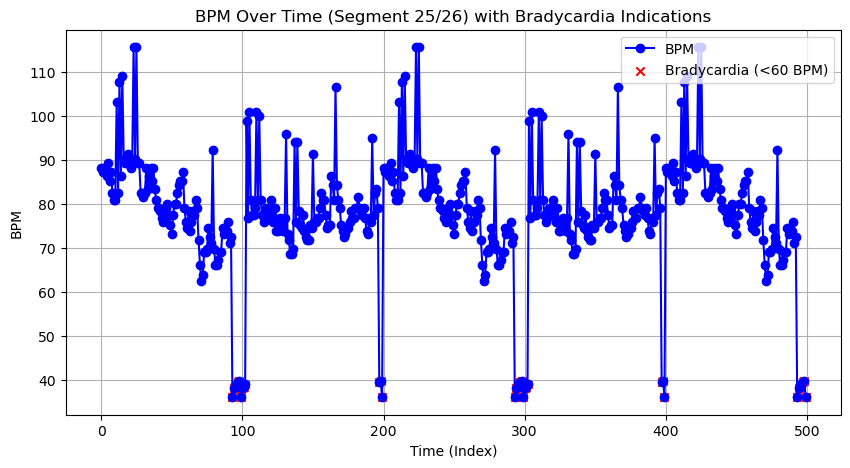

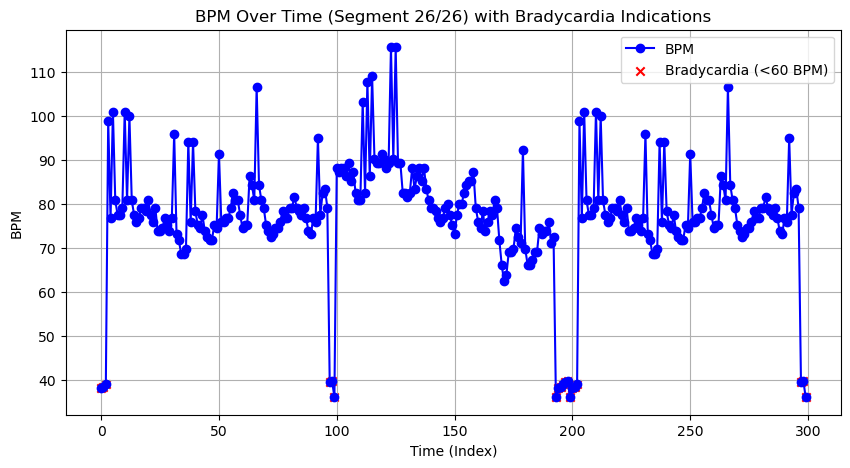

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the BPM data
bpm_file = "/home/Gurshan.R/Documents/GitHub/SYSC4907_Capstone/GAN_Bradycardia/CSV_DATA/BPM_Bradycardia.csv"
df_bpm = pd.read_csv(bpm_file)

# Define bradycardia threshold (typically < 60 BPM for adults, adjust for neonates if needed)
brady_threshold = 60

# Define the number of points to display per segment
segment_size = 500  # Adjust this value based on clarity preference
num_segments = len(df_bpm) // segment_size + (len(df_bpm) % segment_size > 0)

# Generate plots in segments
for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = min(start_idx + segment_size, len(df_bpm))
    df_segment = df_bpm.iloc[start_idx:end_idx].reset_index(drop=True)

    # Identify bradycardia instances in the segment
    bradycardia_indices = df_segment[df_segment["BPM"] < brady_threshold].index
    bradycardia_values = df_segment.loc[bradycardia_indices, "BPM"]

    # Plot BPM values for the segment
    plt.figure(figsize=(10, 5))
    plt.plot(df_segment.index, df_segment["BPM"], label="BPM", color="blue", marker="o", linestyle="-")

    # Highlight bradycardia instances
    plt.scatter(bradycardia_indices, bradycardia_values, color="red", label="Bradycardia (<60 BPM)", marker="x")

    # Labels and title
    plt.xlabel("Time (Index)")
    plt.ylabel("BPM")
    plt.title(f"BPM Over Time (Segment {i+1}/{num_segments}) with Bradycardia Indications")
    plt.legend()
    plt.grid()

    # Show the plot for each segment
    plt.show()


In [7]:
import pandas as pd
import numpy as np

# Load the BPM data
bpm_file = "/home/Gurshan.R/Downloads/BPM_Bradycardia.csv"
df_bpm = pd.read_csv(bpm_file)

# Define segment length (96 points per shift)
segment_length = 96  

# Extract sequences of 96 BPM values
sequences = []
for i in range(0, len(df_bpm) - segment_length + 1, segment_length):  # Non-overlapping segments
    segment = df_bpm["BPM"].iloc[i:i + segment_length].values
    sequences.append(segment)

# Convert to NumPy array and save for GAN training
sequences_array = np.array(sequences)
processed_csv = "/home/Gurshan.R/Downloads/BPM_8hr_5min.csv"
np.savetxt(processed_csv, sequences_array, delimiter=",")

print(f"Processed data saved: {processed_csv}")
print(f"Total sequences prepared: {sequences_array.shape[0]}")


Processed data saved: /home/Gurshan.R/Downloads/BPM_8hr_5min.csv
Total sequences prepared: 133
